# COSC 4372 Fundamentals of Medical Imaging


## A virtual 1-Dimensional (1D) digital X-ray machine (Version 1.0)

We will make certain assumptions that simplify the scanner:

1) X-ray are parallel

2) The virtual human (the phantom) and any structure inside are composed of made of “wedges and parallelograms”. The “human phantom" will be a trapezoid.

3) We will assume that we do not have any scattered rays.

### It is up to us to decide the resolution of the machine and the resolution of the virtual human.

## Input:
1) the specific shape of the virtual human and the layers of the body with different attenuation coefficients ($\mu $). You can use $\mu $ values either from the literature or your own set.

2) Resolution of the 1D image: what feature will determine it? 

## Output:
The 1D profile of the signal intensity of the xrays after they go thorugh the virtual human.

## Let's see some code..

In [1]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Generate Phantom and Display
        # Parameters:
        # (x,y) resolution
        # Length (real world)
        # attenuation values
def generate_phantom (x,y,length,attenuations):

    # Create phantom matrix, U matrix, L matrix
    phantom = np.zeros((y,x), np.uint8) # phantom image
    U = np.zeros((y,x), np.float32) # attenuation matrix
    L = np.ones((y,x), np.float32) # length matrix
    L = L * length / x # how many cm per pixel


    # Phantom will have 4 structures
    #structure1 represents virtual human body
    #structure2 represents top part of the organ
    #structure3 represents middle part of the organ
    #structure4 represents bottom part of the organ
    
    struct_1 = np.zeros((y, x), np.float32)
    struct_2 = np.zeros((y, x), np.float32)
    struct_3 = np.zeros((y, x), np.float32)
    struct_4 = np.zeros((y,x), np.float32)
   
    #Rectangle (Human Body)
    struct_1[int(y*0.1):int(y*0.9),int(x*0.15):int(x*0.9)] = 20
   
    #-----------------------------------------------------
    #-------------Organ Structure------------------------
    #top side of rectangle
    a = 1
    for i in range(int(y * 0.4), int(y * 0.2), -1):
        struct_2[i][int(x * 0.4):int(x * 0.6) - a] = 100
        a = a + 1    
    #middle square
    struct_3[int(y * 0.4):int(y * 0.6), int(x * 0.4):int(x * 0.6)] = 100
    
    #botton part
    b = 1
    for i in range(int(y * 0.6), int(y * 0.8)):
        struct_4[i][int(x * 0.4):int(x * 0.6) - b] = 100
        b = b + 1
    #----------------------------------------------------------

    # Add the structures to the phantom
    phantom += struct_1.astype(np.uint8) + struct_2.astype(np.uint8) + struct_3.astype(np.uint8)+ struct_4.astype(np.uint8) 
  
    # Write a phantom
    cv2.imwrite("phantom.jpg", phantom)

    # Add structure attenuations to U matrix
    U += struct_1 * attenuations[0] + struct_2 * attenuations[1] + struct_3 * attenuations[2] + struct_4 * attenuations[3]
#     print(L)
#     print(phantom)
    return phantom, U, L
    #To rotate the image we will use the bottom code
    #imagerotation = ndimage.rotate(phantom, 180)
    #return imagerotation,U,L


In [3]:
tmp = np.array([[0,1,2],[1,1,1]])
tmp
np.mean(tmp, axis=0)

array([0.5, 1. , 1.5])

In [4]:
# Create a virtual Sensor, get signal intensities
    # Parameters:
        # Resolution (y)
        # Beam intensity (i_0)
def run_x_ray(sensor_resolution, i_0, U, L):
    # Get Intensities
    x_ray = compute_signal_intensity(i_0, U, L)
    
    # map to sensor resolution
    print(x_ray.shape)
    x_ray = x_ray.reshape(sensor_resolution, U.shape[0]//sensor_resolution)
    print(x_ray.shape)
    x_ray = np.mean(x_ray, axis=1)
    print(x_ray.shape)
    return x_ray

## Where the magic happens:

<img src="x_ray_machine.png">
<img src="eq1.png">

<img src="x_ray_machine2.png">
<img src="eq2.png">

## From here we find that the intensity is given by:

$$I = I_{o} * \prod_{i=1}^{\# layers} e^{(-\mu_{i}*l_{i})}$$
For each row/ray.
Where $I_{o}$ is the initial beam intensity, $\mu_{i}$ is the attenuation factor for that layer and $l_{i}$ is the length of that layer.

## Pseudocode

intensities = array(size of rows)

For row j in phantom:

    acumulator = 1
    
    for layer i in row j:
    
        acumulator *= e^(-u(i)*l(i)
        
    done   
    
    intensities(j) = initial_intensity * acumulator
    
done
    

In [5]:
# Compute the instensity across all layers (using matrix multiplication)
def compute_signal_intensity(i_0, U, L):
    return i_0 * np.prod(np.exp(-1 * np.multiply(U,L)), axis=1)

In [6]:
# Show the signal profile
    # Parameter:
        # x_ray - array of signal intensities
def show_graphs(x_ray):
    plt.figure(1)
    plt.title("Intensity Points")
    plt.plot(x_ray, 'ro')
    plt.figure(2)
    plt.title("Intensity Graph")
    plt.plot(x_ray)
    plt.figure(3)
    plt.title("Intensity Merged")
    plt.plot(x_ray, 'ro')
    plt.plot(x_ray)
    plt.ylabel('Signal Intensity')
    plt.show()

(512,)
(16, 32)
(16,)


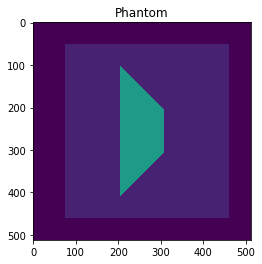

In [7]:
# Phantom Parameters
x = 512 # pixels
y = 512 # pixels
length = 10 # cm
attenuations = [0.2, 0.8, 0.1, 0.5] # factor (0-1)

# Get phantom and matrices
phantom, U, L = generate_phantom(x,y,length,attenuations)

# Display phantom
%matplotlib inline
plt.figure(0)
plt.title("Phantom")
plt.imshow(phantom)

# X-Ray parameters
sensor_resolution = 16  # Must be a factor of image size
i_0 = 40  # keV

# Compute x_ray
x_ray = run_x_ray(sensor_resolution, i_0, U, L)
    

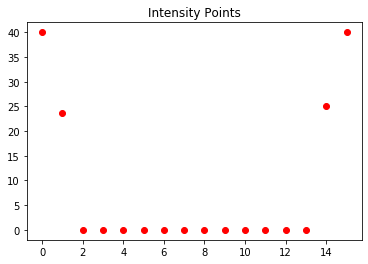

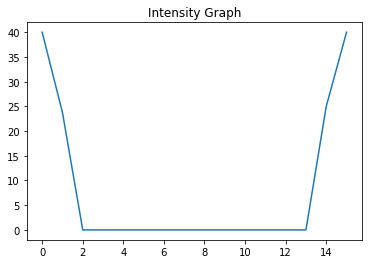

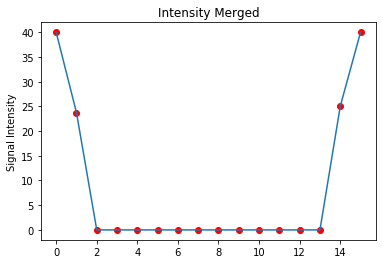

In [8]:
# Display graphs
show_graphs(x_ray)